In [2]:
import pandas as pd
import swifter
import re
from uszipcode import SearchEngine
from uszipcode import SimpleZipcode
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
from ipyleaflet import Map, basemaps, basemap_to_tiles

### We initially thought of choosing the property tax dataset and use it to predict quality of life using other datasets

In [67]:
df=pd.read_csv("Real_Property_Taxes.csv",low_memory=False)

In [68]:
df.columns

Index(['PropertyID', 'Block', 'Lot', 'Ward', 'Sect', 'PropertyAddress',
       'LotSize', 'CityTax', 'StateTax', 'ResCode', 'AmountDue', 'AsOfDate',
       'Neighborhood', 'PoliceDistrict', 'CouncilDistrict', 'Location'],
      dtype='object')

In [69]:
df['Location'].value_counts().count() #No. of unique addressess 

222427

In [70]:
df.head(10)

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0001002,0001,002,15,370,2043 W NORTH AVE,14X83-10,"1,112.76",55.44,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941619, -76.65109034)"
1,5918064,5918,064,26,380,3429 SHANNON DR,18X91-9,"2,801.01",139.55,PRINCIPAL RESIDENCE,"1,356.50",09/29/2018,Belair-Edison,Notheastern,13.0,"(39.3229146, -76.56235554)"
2,0001004,0001,004,15,370,2039 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941951, -76.65099026)"
3,0001005,0001,005,15,370,2037 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942111, -76.65094166)"
4,0001006,0001,006,15,370,2035 W NORTH AVE,14X83-10,247.28,12.32,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942277, -76.65089166)"
5,4179P033,4179P,033,26,340,3811 LYNDALE AVE,14X100,"2,032.19",101.25,NOT A PRINCIPAL RESIDENCE,"2,123.28",07/01/2018,Belair-Edison,Notheastern,13.0,"(39.31680208, -76.56505749)"
6,0001009,0001,009,15,370,2029 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942756, -76.65074605)"
7,0001010,0001,010,15,370,2027 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942925, -76.65069531)"
8,0001011,0001,011,15,370,2025 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30943089, -76.65064581)"
9,0001012,0001,012,15,370,2023 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30943253, -76.65059631)"


In [71]:
df['PropertyAddress'].value_counts().count() #No. of unique addressess 

233669

In [72]:
df['PropertyAddress'].value_counts()

1101 - 1201 HORNERS LANE U# CO-OP    812
1000 HORNERS LANE U# CO-OP           677
SS 15 FT ALLEY 1ST S OF              112
NS 15 FT ALLEY 1ST N OF               83
WS 15 FT ALLEY 1ST W OF               56
NS 15 FT ALLEY                        53
WS 15 FT ALLEY                        51
WS 10 FT ALLEY 1ST W OF               47
ES 10 FT ALLEY 1ST E OF               44
NS 10 FT ALLEY 1ST N OF               43
SS 20 FT ALLEY                        40
ES 15 FT ALLEY 1ST E OF               39
NWS 10 FT ALLEY                       38
SWS 16 FT ALLEY 1ST                   38
SS 10 FT ALLEY 1ST S OF               38
REAR NS FEDERAL ST                    37
SS 20 FT ALLEY 1ST S OF               35
SS 15 FT ALLEY                        34
NS 20 FT ALLEY 1ST N OF               34
NWS 15 FT ALLEY 1ST                   33
ES 16 FT ALLEY 1ST E OF               31
SWS 10 FT ALLEY                       31
1701 - 1723 E BALTIMORE ST U# CO-     28
NES 15 FT ALLEY                       28
SWS 10 FT ALLEY 

### The data in this dataset doesn't seem to be that useful. For a particular address that has 812 occurences the location data is unavailable. So, we will use another dataset.

In [9]:
df[df['PropertyAddress']=='1101 - 1201 HORNERS LANE U# CO-OP'].count() #812 entries for this address but location data is unavailable

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
170781,6190010,6190,010,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,269.76,13.44,PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170790,6190019,6190,019,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,359.68,17.92,PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170791,6190020,6190,020,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,269.76,13.44,PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170792,6190021,6190,021,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,269.76,13.44,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170793,6190022,6190,022,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,269.76,13.44,PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170794,6190023,6190,023,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,269.76,13.44,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170795,6190024,6190,024,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,359.68,17.92,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170796,6190025,6190,025,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,359.68,17.92,PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170797,6190026,6190,026,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,269.76,13.44,PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
170798,6190027,6190,027,26,200,1101 - 1201 HORNERS LANE U# CO-OP,741 SF IMP. ONLY,269.76,13.44,PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN


In [10]:
df[df['PropertyAddress']=='SS 15 FT ALLEY 1ST S OF']

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
3474,2506A048,2506A,048,16,170,SS 15 FT ALLEY 1ST S OF,9-8X26-3,8.99,0.45,NOT A PRINCIPAL RESIDENCE,9.62,09/28/2018,Edgewood,Southwestern,8.0,"(39.2960823, -76.67932436)"
3475,2506A050,2506A,050,16,170,SS 15 FT ALLEY 1ST S OF,9-8X26-3,8.99,0.45,NOT A PRINCIPAL RESIDENCE,9.62,09/28/2018,Edgewood,Southwestern,8.0,"(39.29608403, -76.67925488)"
3476,2506A051,2506A,051,16,170,SS 15 FT ALLEY 1ST S OF,10-4X38-3,11.24,0.56,NOT A PRINCIPAL RESIDENCE,12.03,09/28/2018,Edgewood,Southwestern,8.0,"(39.29606731, -76.67921643)"
3478,2506A053,2506A,053,16,170,SS 15 FT ALLEY 1ST S OF,9-8X32-6,8.99,0.45,NOT A PRINCIPAL RESIDENCE,9.62,09/28/2018,Edgewood,Southwestern,8.0,"(39.29607722, -76.67914719)"
3479,2506A055,2506A,055,16,170,SS 15 FT ALLEY 1ST S OF,38-6X17-6,24.73,1.23,NOT A PRINCIPAL RESIDENCE,26.46,09/28/2018,Edgewood,Southwestern,8.0,"(39.29609398, -76.6790289)"
11520,4179E126,4179E,126,26,370,SS 15 FT ALLEY 1ST S OF,12X40,20.23,1.01,NOT A PRINCIPAL RESIDENCE,22.06,10/31/2018,Belair-Edison,Notheastern,13.0,"(39.32045853, -76.56597649)"
40439,1529087,1529,087,8,100,SS 15 FT ALLEY 1ST S OF,35-6X102-6,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Broadway East,Eastern,12.0,"(39.3049323, -76.59378597)"
40440,1529088,1529,088,8,100,SS 15 FT ALLEY 1ST S OF,65-8X93-3,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Broadway East,Eastern,12.0,"(39.30499236, -76.59364524)"
54657,7958069,7958,069,28,50,SS 15 FT ALLEY 1ST S OF,30X25,15.74,0.78,NOT A PRINCIPAL RESIDENCE,17.16,10/31/2018,Rognel Heights,Southwestern,8.0,"(39.29532087, -76.69287581)"
66247,2297025A,2297,025A,20,30,SS 15 FT ALLEY 1ST S OF,10X20,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Allendale,Southwestern,8.0,"(39.29207674, -76.68330019)"


In [73]:
df[df['Location'].isnull()]

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
25,0366024,0366,024,14,140,301 MCMECHEN ST U# 21,3773.6 SQFT,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
207,0366025,0366,025,14,140,301 MCMECHEN ST U# 22,3889.2 SQFT,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
233,0366026,0366,026,14,140,301 MCMECHEN ST U# 23,3773.6 SQFT,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
285,0366027,0366,027,14,140,301 MCMECHEN ST U# 24,3773.6 SQFT,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
352,0366028,0366,028,14,140,301 MCMECHEN ST U# 25,3889.2 SQFT,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
355,2108C001B,2108C,001B,25,20,900 DESOTO ROAD,2.1691 ACRES,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,08/15/2018,NaN,NaN,NaN,NaN
381,0366029,0366,029,14,140,301 MCMECHEN ST U# 26,3773.6 SQFT,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN
492,3575C373,3575C,373,13,150,SWM AREA,0.439 ACRES,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,08/15/2018,NaN,NaN,NaN,NaN
494,4070A059A,4070A,059A,9,40,2561 BOONE ST,0.061 ACRES1,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,08/15/2018,NaN,NaN,NaN,NaN
516,0366030,0366,030,14,140,301 MCMECHEN ST U# 27,3773.6 SQFT,NaN,NaN,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,NaN,NaN,NaN,NaN


## We decided to use 911 Police Calls:- 

In [27]:
df=pd.read_csv("911_Police_Calls_for_Service.csv",low_memory=False)

In [28]:
df.columns

Index(['recordId', 'callDateTime', 'priority', 'district', 'description',
       'callNumber', 'incidentLocation', 'location'],
      dtype='object')

In [29]:
print(len(df))
(df[df['location'].notnull()]).count() #So we have 3918129 / 3982427 location values that are not null

3982427


recordId            3918129
callDateTime        3918129
priority            3911479
district            3918129
description         3918129
callNumber          3918129
incidentLocation    3918121
location            3918129
dtype: int64

In [30]:
df=df[df['location'].notnull()] #3918129 rows × 8 columns

In [33]:
# df=df[df['location'].notnull()]
df['coord1']= None
df['coord2']=None
df.head(5)

,recordId,callDateTime,priority,district,description,callNumber,incidentLocation,location,coord1,coord2
0,1423624,05/04/2016 09:58:00 PM,High,ND,SILENT ALARM,P161253035,400 WINSTON AV,"400 WINSTON AV\nBALTIMORE, MD\n(39.349792, -76...",None,None
1,1402097,04/27/2016 03:57:00 PM,Medium,SW,911/HANGUP,P161182081,1400 BRADDISH AV,"1400 BRADDISH AV\nBALTIMORE, MD\n(39.303941, -...",None,None
2,1420176,05/03/2016 06:40:00 PM,Medium,ED,DISORDERLY,P161242705,200 E NORTH AV,"200 E NORTH AV\nBALTIMORE, MD\n(39.311294, -76...",None,None
3,1423653,05/04/2016 10:10:00 PM,Medium,NE,911/NO VOICE,P161253068,2500-1 HARFORD RD,"2500 1 HARFORD RD\nBALTIMORE, MD\n(39.316763, ...",None,None
4,1417949,05/03/2016 12:29:00 AM,Non-Emergency,SD,Private Tow,P161240063,100 W PATAPSCO AV,"100 W PATAPSCO AV\nBALTIMORE, MD\n(39.239215, ...",None,None


### The following functions apply regex on location strings and extracts latitude and logitude data. We have also applied swifter to execute .apply() in parallel. 

In [34]:
def split_it(coord):
    m = re.findall(r"\((\d+.\d+)..(.\d+.\d+)\)", coord)
    if(len(m)>0):
        return str(m[0][0])
    else:
        return None
df['coord1']=df['location'].swifter.apply(split_it)

Pandas Apply: 100%|██████████| 3918129/3918129 [00:07<00:00, 493239.74it/s]


In [35]:
def split_it(coord):
    m = re.findall(r"\((\d+.\d+)..(.\d+.\d+)\)", coord)
    if(len(m)>0):
        return str(m[0][1])
    else:
        return None
df['coord2']=df['location'].swifter.apply(split_it)

Pandas Apply: 100%|██████████| 3918129/3918129 [00:07<00:00, 507176.14it/s]


In [36]:
df.head(5)

,recordId,callDateTime,priority,district,description,callNumber,incidentLocation,location,coord1,coord2
0,1423624,05/04/2016 09:58:00 PM,High,ND,SILENT ALARM,P161253035,400 WINSTON AV,"400 WINSTON AV\nBALTIMORE, MD\n(39.349792, -76...",39.349792,-76.613468
1,1402097,04/27/2016 03:57:00 PM,Medium,SW,911/HANGUP,P161182081,1400 BRADDISH AV,"1400 BRADDISH AV\nBALTIMORE, MD\n(39.303941, -...",39.303941,-76.66084
2,1420176,05/03/2016 06:40:00 PM,Medium,ED,DISORDERLY,P161242705,200 E NORTH AV,"200 E NORTH AV\nBALTIMORE, MD\n(39.311294, -76...",39.311294,-76.612806
3,1423653,05/04/2016 10:10:00 PM,Medium,NE,911/NO VOICE,P161253068,2500-1 HARFORD RD,"2500 1 HARFORD RD\nBALTIMORE, MD\n(39.316763, ...",39.316763,-76.595269
4,1417949,05/03/2016 12:29:00 AM,Non-Emergency,SD,Private Tow,P161240063,100 W PATAPSCO AV,"100 W PATAPSCO AV\nBALTIMORE, MD\n(39.239215, ...",39.239215,-76.61151


### Now we shall remove the null values, because we cannot extract location coordinates without the addresses.

In [37]:
df[df['coord1'].notnull()].count()

recordId            3026854
callDateTime        3026854
priority            3022165
district            3026854
description         3026854
callNumber          3026854
incidentLocation    3026846
location            3026854
coord1              3026854
coord2              3026854
dtype: int64

In [38]:
print(len(df))

3918129


In [39]:
#Now we need to remove null values in coord1 and coord2
df=df[df['coord1'].notnull()]

In [40]:
df=df[df['coord2'].notnull()]

In [41]:
print(len(df))
df[df['coord1'].notnull()].count()

3026854


recordId            3026854
callDateTime        3026854
priority            3022165
district            3026854
description         3026854
callNumber          3026854
incidentLocation    3026846
location            3026854
coord1              3026854
coord2              3026854
dtype: int64

### We have ensured that all coordiante values are present. We have lost around 25% of data with no location coordinates.

In [43]:
df.head(5)

,recordId,callDateTime,priority,district,description,callNumber,incidentLocation,location,coord1,coord2
0,1423624,05/04/2016 09:58:00 PM,High,ND,SILENT ALARM,P161253035,400 WINSTON AV,"400 WINSTON AV\nBALTIMORE, MD\n(39.349792, -76...",39.349792,-76.613468
1,1402097,04/27/2016 03:57:00 PM,Medium,SW,911/HANGUP,P161182081,1400 BRADDISH AV,"1400 BRADDISH AV\nBALTIMORE, MD\n(39.303941, -...",39.303941,-76.66084
2,1420176,05/03/2016 06:40:00 PM,Medium,ED,DISORDERLY,P161242705,200 E NORTH AV,"200 E NORTH AV\nBALTIMORE, MD\n(39.311294, -76...",39.311294,-76.612806
3,1423653,05/04/2016 10:10:00 PM,Medium,NE,911/NO VOICE,P161253068,2500-1 HARFORD RD,"2500 1 HARFORD RD\nBALTIMORE, MD\n(39.316763, ...",39.316763,-76.595269
4,1417949,05/03/2016 12:29:00 AM,Non-Emergency,SD,Private Tow,P161240063,100 W PATAPSCO AV,"100 W PATAPSCO AV\nBALTIMORE, MD\n(39.239215, ...",39.239215,-76.61151


In [44]:
df['priority'].value_counts()

Medium            1583503
Low                625192
High               474410
Non-Emergency      337544
Out of Service        836
Emergency             680
Name: priority, dtype: int64

In [45]:
df[df['priority'].isnull()] #4689 rows

,recordId,callDateTime,priority,district,description,callNumber,incidentLocation,location,coord1,coord2
68088,336475,04/29/2015 03:45:00 PM,NaN,SE,DESTRUCT PROPTY,P151191699,1600 LANCASTER ST,"1600 LANCASTER ST\nBALTIMORE, MD\n(39.282499, ...",39.282499,-76.595098
68163,329501,04/27/2015 07:25:00 PM,NaN,NE,BURGLARY,P151172506,1600 BLK ABBOTSTON ST,"1600 BLK ABBOTSTON ST\nBALTIMORE, MD\n(39.3227...",39.322798,-76.594368
68185,339740,04/30/2015 07:41:00 PM,NaN,WD,COMMON ASSAULT,P151202159,900 N STRICKER ST,"900 N STRICKER ST\nBALTIMORE, MD\n(39.299059, ...",39.299059,-76.641536
68193,331405,04/28/2015 04:20:00 AM,NaN,WD,BURGLARY,P151180980,1900 BLK N BENTALOU ST,"1900 BLK N BENTALOU ST\nBALTIMORE, MD\n(39.309...",39.309995,-76.654099
68202,328897,04/27/2015 04:43:00 PM,NaN,CD,POLICE INFO,P151171906,1500 BLK PENNSYLVANIA AV,"1500 BLK PENNSYLVANIA AV\nBALTIMORE, MD\n(39.3...",39.301922,-76.632707
68204,329703,04/27/2015 08:12:00 PM,NaN,CD,DISORDERLY,P151172711,200-40 MCMECHEN ST,"200 40 MCMECHEN ST\nBALTIMORE, MD\n(39.307389,...",39.307389,-76.627472
68212,329599,04/27/2015 07:48:00 PM,NaN,WD,BURGLARY,P151172602,2300 BLK GWYNNS FALLS PY,"2300 BLK GWYNNS FALLS\nPY BALTIMORE, MD\n(39.3...",39.315753,-76.655098
68346,333131,04/28/2015 02:33:00 PM,NaN,CD,DISORDERLY,P151182806,300 W BALTIMORE ST,"300 W BALTIMORE ST\nBALTIMORE, MD\n(39.289354,...",39.289354,-76.619434
68347,330302,04/27/2015 10:26:00 PM,NaN,SD,BURGLARY,P151173354,2000 BLK W PRATT ST,"2000 BLK W PRATT ST\nBALTIMORE, MD\n(39.285032...",39.285032,-76.648652
68366,328841,04/27/2015 04:21:00 PM,NaN,SD,DISORDERLY,P151171811,3500 6TH ST,"3500 6TH ST\nBALTIMORE, MD\n(39.238436, -76.60...",39.238436,-76.601224


In [46]:
#Removing unused coloumns
df=df.drop(['recordId', 'district', 'callNumber', 'incidentLocation' , 'location'], axis=1)

In [47]:
df.head(5)

,callDateTime,priority,description,coord1,coord2
0,05/04/2016 09:58:00 PM,High,SILENT ALARM,39.349792,-76.613468
1,04/27/2016 03:57:00 PM,Medium,911/HANGUP,39.303941,-76.66084
2,05/03/2016 06:40:00 PM,Medium,DISORDERLY,39.311294,-76.612806
3,05/04/2016 10:10:00 PM,Medium,911/NO VOICE,39.316763,-76.595269
4,05/03/2016 12:29:00 AM,Non-Emergency,Private Tow,39.239215,-76.61151


### The following function fills the misssing  'priority' values by looking at rest of the data using 'description'.

In [48]:
def fill_priorities(desc):
#     string=str(df[df['description']==desc].head(1).priority).split('    ')
#     print(string)
    if(len(df[df['description']==desc].head(1))>0):
        return(df[df['description']==desc].head(1).iat[0,1])
    else:
        return(None)
    
df_null_priority=df[df['priority'].isnull()]
df=df[df['priority'].notnull()]
df_null_priority['priority']=df_null_priority['description'].swifter.apply(fill_priorities)

Pandas Apply: 100%|██████████| 4689/4689 [24:49<00:00,  3.11it/s]


In [ ]:
df_null_priority[df_null_priority['priority'].isnull()]

### We have only 3 rows in the complete dataset that has none priority. so we can drop those.

In [51]:
# We have only 3 rows in the complete dataset that has none priority. so we can drop those.
df_null_priority=df_null_priority[df_null_priority['priority'].notnull()]

### No null values in priority for df_null_priority. Now we will merge the dataframes. Also, we have several checkpoints in order to save time later.

In [53]:
df=pd.concat([df,df_null_priority]) #Joining data frames.

In [55]:
df.to_csv("df_checkpoint1.csv") #CHECKPOINT 1 --> After Inserting Missing Values

In [57]:
df=pd.read_csv("df_checkpoint1.csv")
df.head(5)

,Unnamed: 0,callDateTime,priority,description,coord1,coord2
0,0,05/04/2016 09:58:00 PM,High,SILENT ALARM,39.349792,-76.613468
1,1,04/27/2016 03:57:00 PM,Medium,911/HANGUP,39.303941,-76.660840
2,2,05/03/2016 06:40:00 PM,Medium,DISORDERLY,39.311294,-76.612806
3,3,05/04/2016 10:10:00 PM,Medium,911/NO VOICE,39.316763,-76.595269
4,4,05/03/2016 12:29:00 AM,Non-Emergency,Private Tow,39.239215,-76.611510


### Normalizing date to get rid of timestamp.

In [58]:
df['callDateTime']=pd.to_datetime(df['callDateTime'])
df.callDateTime = df.callDateTime.dt.normalize()
df.head(5)

,Unnamed: 0,callDateTime,priority,description,coord1,coord2
0,0,2016-05-04,High,SILENT ALARM,39.349792,-76.613468
1,1,2016-04-27,Medium,911/HANGUP,39.303941,-76.660840
2,2,2016-05-03,Medium,DISORDERLY,39.311294,-76.612806
3,3,2016-05-04,Medium,911/NO VOICE,39.316763,-76.595269
4,4,2016-05-03,Non-Emergency,Private Tow,39.239215,-76.611510


In [59]:
df.to_csv("df_checkpoint2.csv") #CHECKPOINT 2 After normalizing the dates.

In [74]:
df=pd.read_csv("df_checkpoint2.csv")
df.head(5)

,Unnamed: 0,Unnamed: 0.1,callDateTime,priority,description,coord1,coord2
0,0,0,2016-05-04,High,SILENT ALARM,39.349792,-76.613468
1,1,1,2016-04-27,Medium,911/HANGUP,39.303941,-76.660840
2,2,2,2016-05-03,Medium,DISORDERLY,39.311294,-76.612806
3,3,3,2016-05-04,Medium,911/NO VOICE,39.316763,-76.595269
4,4,4,2016-05-03,Non-Emergency,Private Tow,39.239215,-76.611510


### We decided to use only high and medium priority request to save time.

In [ ]:
df_high=df[df['priority']=='High']
df_med=df[df['priority']=='Medium']
df=pd.concat([df_high,df_med])

In [78]:
df=df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.columns

Index(['callDateTime', 'priority', 'description', 'coord1', 'coord2'], dtype='object')

In [81]:
df=df.reset_index()

In [82]:
df.head(5)

,index,callDateTime,priority,description,coord1,coord2
0,0,2016-05-04,High,SILENT ALARM,39.349792,-76.613468
1,9,2016-05-03,High,SILENT ALARM,39.272798,-76.645491
2,21,2016-04-29,High,FIRE,39.294123,-76.615480
3,22,2016-05-07,High,ROBBERY ARMED,39.292796,-76.625333
4,23,2016-05-01,High,SILENT ALARM,39.370810,-76.703680


In [83]:
#Now, we shall process the callDateTime 
df.dtypes

index             int64
callDateTime     object
priority         object
description      object
coord1          float64
coord2          float64
dtype: object

In [84]:
df['coord1']=df['coord1'].astype(float)
df['coord2']=df['coord2'].astype(float)

### We have filtered the zipcodes using bounding box coordinates for Baltimore area to get rid of outliers. 

In [85]:
df[(df['coord1']>=38.374862) & (df['coord1']<=39.715723) & (df['coord2']>= -77.981992) & (df['coord2']<= -75.801200)].count()

index           2043022
callDateTime    2043022
priority        2043022
description     2043022
coord1          2043022
coord2          2043022
dtype: int64

In [86]:
df=df.query("coord1 > 38.374862 and coord1 < 39.715723 and coord2 > -77.981992 and coord2 < -75.801200")

In [87]:
df.count()

index           2043022
callDateTime    2043022
priority        2043022
description     2043022
coord1          2043022
coord2          2043022
dtype: int64

In [43]:
df.dtypes

callDateTime    datetime64[ns]
priority                object
description             object
coord1                 float64
coord2                 float64
dtype: object

### The following code helps in identifying the pincodes of a given location. This is a simple and easy way to find zipcodes given the location coordinates.  

In [44]:
search = SearchEngine(simple_zipcode=True)
result = search.by_coordinates(40.732351, -114.040769, radius=50, returns=1)
zipcode = str(result).split(',')[0].split('=')[1][1:6]
print(zipcode)
print(result)
# df['zipcode']=None

84034
[SimpleZipcode(zipcode='84034', zipcode_type='Standard', major_city='Ibapah', post_office_city='Ibapah, UT', common_city_list=['Ibapah', 'Callao'], county='Tooele County', state='UT', lat=40.038, lng=-113.988, timezone='Mountain', radius_in_miles=0.11363636363636363, area_code_list=['435'], population=209, population_density=0.0, land_area_in_sqmi=593.55, water_area_in_sqmi=0.01, housing_units=126, occupied_housing_units=67, median_home_value=114100, median_household_income=42083, bounds_west=-114.227807, bounds_east=-113.683086, bounds_north=40.429867, bounds_south=39.667678)]


In [45]:
df['zipcode']=None

In [46]:
df.columns

Index(['callDateTime', 'priority', 'description', 'coord1', 'coord2',
       'zipcode'],
      dtype='object')

In [55]:
df_zip=pd.DataFrame(df.groupby(['coord1', 'coord2']).size())
df_zip=df_zip.reset_index()
df_zip.drop(0,axis=1,inplace=True)
df_zip['zip']=None
df_zip.tail(5)

,coord1,coord2,zip
17165,39.685799,-77.803101,None
17166,39.694327,-77.744824,None
17167,39.700382,-76.501076,None
17168,39.708302,-76.916702,None
17169,39.714199,-76.654198,None


In [56]:
def get_zip(coord1,coord2):
    result = search.by_coordinates(float(coord1), float(coord2), radius=25, returns=1)
    return str(result).split(',')[0].split('=')[1][1:6]

In [57]:
df_zip['zip'] = df_zip[['coord1','coord2']].apply(lambda x: get_zip(*x), axis=1) #Runtime is around 10-15 min.

### This process of finding zipcodes is painstakingly long, thus we filtered our data to use only high priority requests. 

In [58]:
df_zip.count()

coord1    17170
coord2    17170
zip       17170
dtype: int64

In [59]:
df_zip.to_csv("df_zip_HighPriorityOnly.csv")

In [88]:
df_zip_high=pd.read_csv("df_zip_HighPriorityOnly.csv",index_col=0)

In [89]:
df_zip_high.count()

coord1    17170
coord2    17170
zip       17170
dtype: int64

In [93]:
df_zip_high.tail(5)

,coord1,coord2,zip
17165,39.685799,-77.803101,21767
17166,39.694327,-77.744824,21767
17167,39.700382,-76.501076,17352
17168,39.708302,-76.916702,17329
17169,39.714199,-76.654198,17361


In [94]:
df_high.tail(5)

,Unnamed: 0,Unnamed: 0.1,callDateTime,priority,description,coord1,coord2
3026774,3026774,3650524,2015-04-28,High,ROBBERY ARMED,39.293957,-76.678525
3026778,3026778,3650973,2015-05-11,High,ROBBERY ARMED,39.318024,-76.577785
3026787,3026787,3651500,2015-05-01,High,ARMED PERSON,39.296826,-76.580320
3026792,3026792,3671751,2015-05-05,High,ARMED PERSON,39.343133,-76.677272
3026793,3026793,3672028,2015-05-02,High,ROBBERY ARMED,39.356513,-76.702964


In [95]:
df_final=pd.merge(df_high,df_zip_high,left_on=['coord1','coord2'],right_on=['coord1','coord2'])
df_final.tail(5)

,Unnamed: 0,Unnamed: 0.1,callDateTime,priority,description,coord1,coord2,zip
300197,3017907,3976942,2018-08-13,High,SILENT ALARM,39.367945,-76.604297,21239
300198,3018240,3977368,2018-08-10,High,ARMED PERSON,39.309656,-76.639100,21217
300199,3019000,3978338,2018-08-11,High,DISCHRG FIREARM,39.292598,-76.595700,21231
300200,3020796,3980619,2018-08-10,High,Traffic Stop,39.418615,-76.555815,21286
300201,3021828,3981982,2018-08-13,High,Traffic Stop,39.230381,-76.601788,21225


In [97]:
df_final=df_final.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)

In [98]:
df_final.columns

Index(['callDateTime', 'priority', 'description', 'coord1', 'coord2', 'zip'], dtype='object')

In [101]:
df_final['zip'].value_counts()

21217    31187
21231    24996
21205    24328
21223    23510
21218    22145
21202    21010
21215    18474
21201    18358
21216    16489
21213    13886
21229    10959
21225     9090
21214     9035
21206     8750
21230     8568
21211     6754
21224     5293
21210     4468
21239     4468
21212     3676
21209     3561
21207     2324
21227     2001
21208     1133
21921      766
21742      397
21617      393
21152      336
20737      333
21228      324
         ...  
21157        1
21755        1
21678        1
21673        1
20905        1
20722        1
21162        1
20685        1
21074        1
20817        1
20854        1
21077        1
21837        1
21631        1
20815        1
20814        1
21117        1
21104        1
20019        1
21620        1
20783        1
21053        1
20853        1
21797        1
20872        1
21798        1
21128        1
20623        1
20769        1
20746        1
Name: zip, Length: 159, dtype: int64

In [102]:
df_final.count()

callDateTime    300202
priority        300202
description     300202
coord1          300202
coord2          300202
zip             300202
dtype: int64

In [103]:
df_final.to_csv("df_checkpoint3.csv",index=False)

In [4]:
df=pd.read_csv("df_checkpoint3.csv")

In [5]:
df.tail(5)

,callDateTime,priority,description,coord1,coord2,zip
300197,2018-08-13,High,SILENT ALARM,39.367945,-76.604297,21239
300198,2018-08-10,High,ARMED PERSON,39.309656,-76.639100,21217
300199,2018-08-11,High,DISCHRG FIREARM,39.292598,-76.595700,21231
300200,2018-08-10,High,Traffic Stop,39.418615,-76.555815,21286
300201,2018-08-13,High,Traffic Stop,39.230381,-76.601788,21225


In [8]:
df.callDateTime=pd.to_datetime(df.callDateTime)

### Now, we processed the filtered data to work on the scoring part.

In [10]:
df['month']=pd.to_numeric(df.callDateTime.dt.month)
df['year']=pd.to_numeric(df.callDateTime.dt.year)
df.dtypes

callDateTime    datetime64[ns]
priority                object
description             object
coord1                 float64
coord2                 float64
zip                      int64
month                    int64
year                     int64
dtype: object

In [11]:
df['month-year']=df['callDateTime'].values.astype('datetime64[M]')
df.tail(5)

,callDateTime,priority,description,coord1,coord2,zip,month,year,month-year
300197,2018-08-13,High,SILENT ALARM,39.367945,-76.604297,21239,8,2018,2018-08-01
300198,2018-08-10,High,ARMED PERSON,39.309656,-76.639100,21217,8,2018,2018-08-01
300199,2018-08-11,High,DISCHRG FIREARM,39.292598,-76.595700,21231,8,2018,2018-08-01
300200,2018-08-10,High,Traffic Stop,39.418615,-76.555815,21286,8,2018,2018-08-01
300201,2018-08-13,High,Traffic Stop,39.230381,-76.601788,21225,8,2018,2018-08-01


In [12]:
df.groupby(['year', 'month']).agg(['count'])['zip'].unstack()

count                                                                  \
month      1       2       3       4       5       6       7       8       9    
year                                                                            
2015   3626.0  3201.0  7086.0  7058.0  4619.0  5263.0  5935.0  6119.0  5756.0   
2016   6446.0  6845.0  6809.0  6060.0  6167.0  6022.0  5809.0  5952.0  5473.0   
2017   6798.0  6115.0  6067.0  6060.0  6604.0  6448.0  6359.0  6644.0  6324.0   
2018   8433.0  7314.0  7686.0  7825.0  8077.0  7500.0  6746.0  7756.0  6929.0   

                               
month      10      11      12  
year                           
2015   6380.0  6108.0  6281.0  
2016   5907.0  5416.0  5185.0  
2017   6900.0  6353.0  6483.0  
2018   8208.0  7050.0     NaN

### Initial visualizations show that overall trend is increasing for some zipcodes.

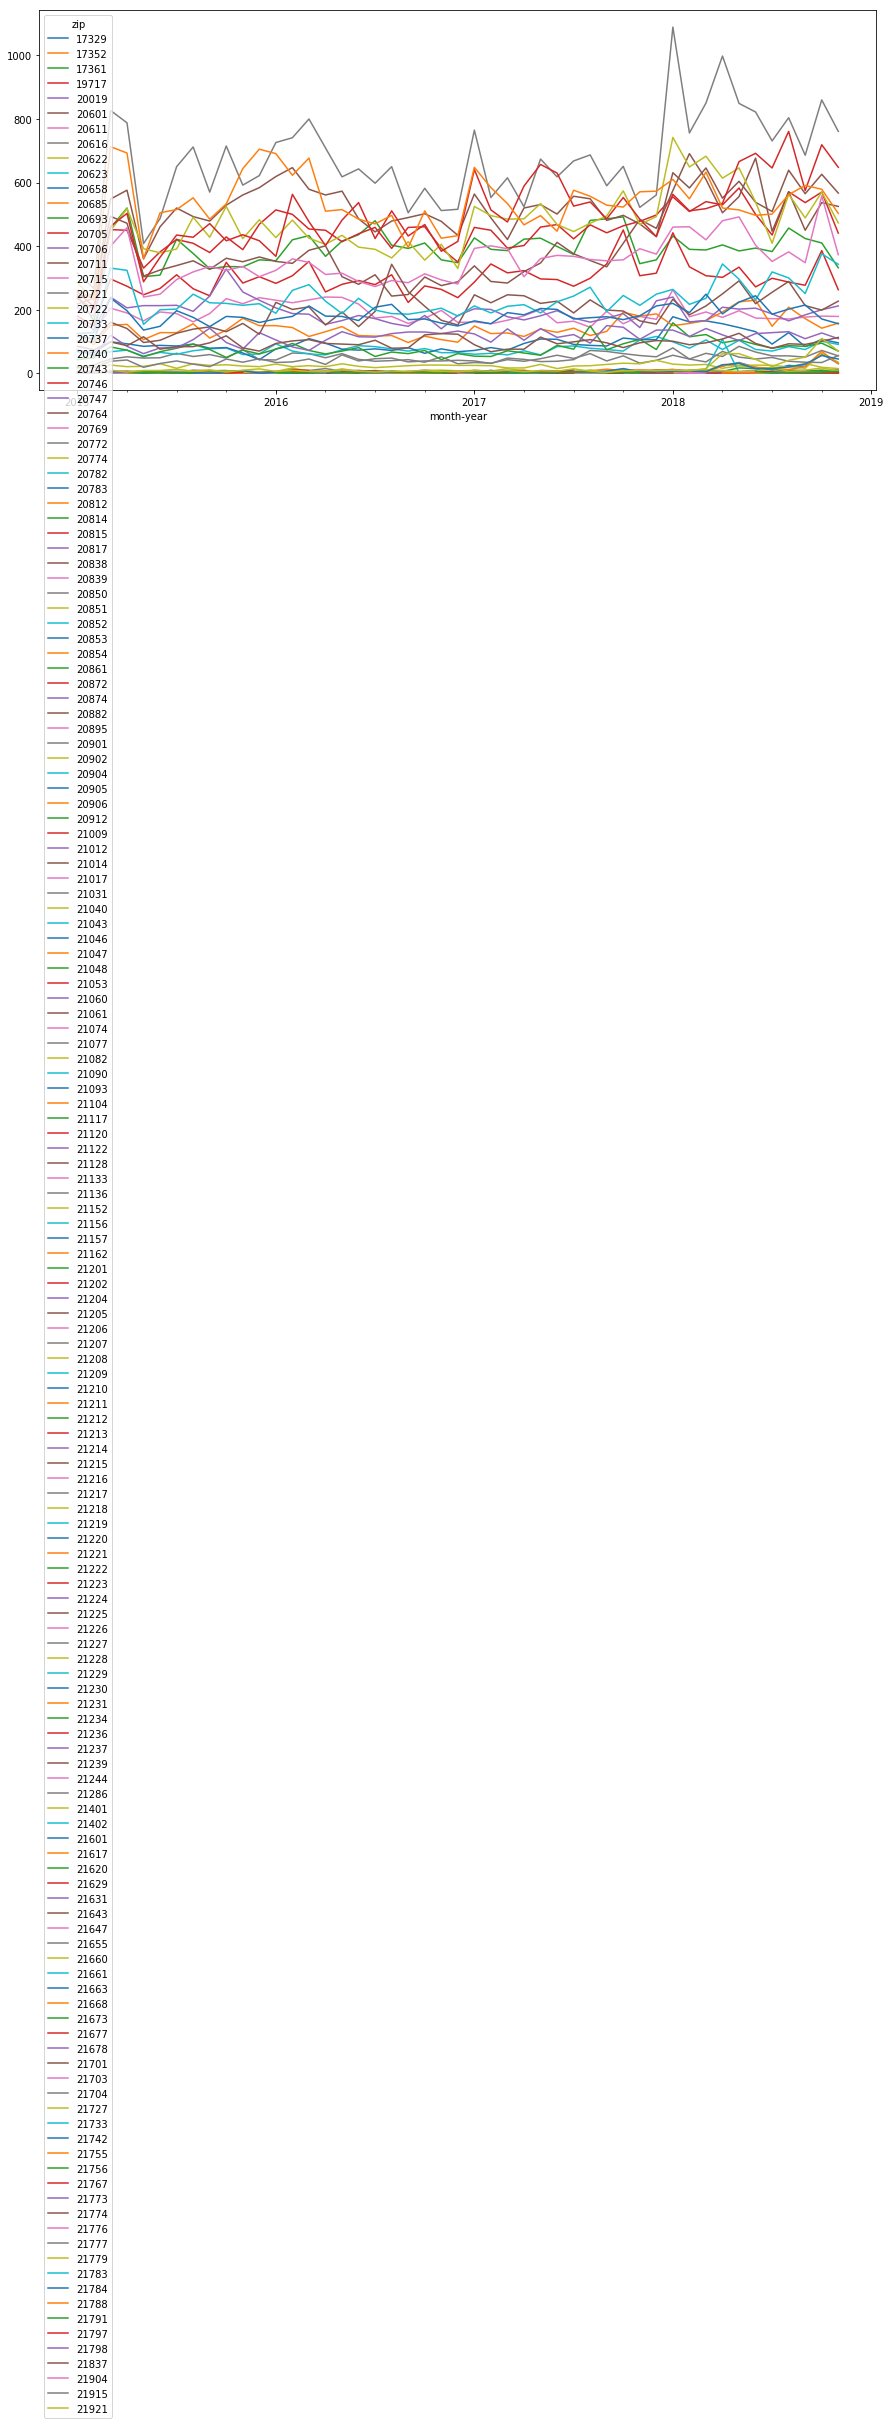

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['month-year','zip']).count()['priority'].unstack().plot(ax=ax)

In [17]:
df.tail(5)

,callDateTime,priority,description,coord1,coord2,zip,month,year,month-year
300197,2018-08-13,High,SILENT ALARM,39.367945,-76.604297,21239,8,2018,2018-08-01
300198,2018-08-10,High,ARMED PERSON,39.309656,-76.639100,21217,8,2018,2018-08-01
300199,2018-08-11,High,DISCHRG FIREARM,39.292598,-76.595700,21231,8,2018,2018-08-01
300200,2018-08-10,High,Traffic Stop,39.418615,-76.555815,21286,8,2018,2018-08-01
300201,2018-08-13,High,Traffic Stop,39.230381,-76.601788,21225,8,2018,2018-08-01


In [18]:
df2=df

In [19]:
df2=df2.drop(columns=['coord1','coord2','year','month','priority','callDateTime'])

In [20]:
df2.tail(5)

,description,zip,month-year
300197,SILENT ALARM,21239,2018-08-01
300198,ARMED PERSON,21217,2018-08-01
300199,DISCHRG FIREARM,21231,2018-08-01
300200,Traffic Stop,21286,2018-08-01
300201,Traffic Stop,21225,2018-08-01


In [135]:
df3=df2.groupby(['zip','month-year']).count()

In [136]:
df3=df3.fillna(0.0)

In [137]:
df3.describe()

,description
count,2628.000000
mean,114.232116
std,180.662298
min,1.000000
25%,2.000000
50%,7.000000
75%,167.000000
max,1089.000000


In [138]:
df3=df3.reset_index()
df3.describe()

,zip,description
count,2628.000000,2628.000000
mean,21186.938737,114.232116
std,486.498603,180.662298
min,17329.000000,1.000000
25%,21152.000000,2.000000
50%,21215.000000,7.000000
75%,21231.000000,167.000000
max,21921.000000,1089.000000


In [140]:
df3.columns=['zip','date','count']

In [141]:
df3.head(5)

,zip,date,count
0,17329,2016-04-01,1
1,17329,2016-08-01,1
2,17352,2016-06-01,1
3,17352,2016-11-01,2
4,17352,2016-12-01,2


In [142]:
df3['count']=pd.to_numeric(df3['count'])
df3.dtypes

zip               int64
date     datetime64[ns]
count             int64
dtype: object

In [143]:
df3['count'].quantile(0.85)

318.84999999999945

### Scoring for any zipcode is decided based on number of calls. Areas having high number of calls recieve less score and vice versa.

In [144]:
df3['911-score']=10-(df3['count']/320.0)*10

In [145]:
df3.tail(5)

,zip,date,count,911-score
2623,21921,2018-07-01,22,9.31250
2624,21921,2018-08-01,41,8.71875
2625,21921,2018-09-01,51,8.40625
2626,21921,2018-10-01,110,6.56250
2627,21921,2018-11-01,70,7.81250


In [75]:
def less_than_zero(score):
   if score <= 0:
       return 0
   else:
       return score

In [147]:
df3['911-score']=df3['911-score'].apply(less_than_zero)

In [148]:
df3.tail(5)

,zip,date,count,911-score
2623,21921,2018-07-01,22,9.31250
2624,21921,2018-08-01,41,8.71875
2625,21921,2018-09-01,51,8.40625
2626,21921,2018-10-01,110,6.56250
2627,21921,2018-11-01,70,7.81250


In [149]:
df3['911-score'].describe()

count    2628.000000
mean        7.240665
std         3.778226
min         0.000000
25%         4.781250
50%         9.781250
75%         9.937500
max         9.968750
Name: 911-score, dtype: float64

In [153]:
df3.head(5)

,zip,date,911-score
0,17329,2016-04-01,9.96875
1,17329,2016-08-01,9.96875
2,17352,2016-06-01,9.96875
3,17352,2016-11-01,9.93750
4,17352,2016-12-01,9.93750


In [152]:
df3.drop(columns=['count'],inplace=True)

### The final dataframe after processing of 911 Calls is saved to use further for future predictions.

In [155]:
df3.to_csv("911-scores.csv",index=False)